In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('./train_data.csv')
test = pd.read_csv('./test_data.csv')
train['label'] = 0
test['label'] = 1

In [4]:
train

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type,label
0,1.59,41.00,0.7,20.53,1680.0,58.67,2.93,0,0
1,2.97,59.28,0.7,38.40,3142.0,74.91,3.75,0,0
2,1.91,45.29,0.7,24.73,2023.0,62.48,3.12,0,0
3,2.37,51.33,0.7,30.63,2506.0,67.84,3.39,0,0
4,1.90,45.21,0.7,24.65,2017.0,62.41,3.12,0,0
...,...,...,...,...,...,...,...,...,...
2458,2.28,50.20,0.7,29.53,2416.0,66.84,3.34,7,0
2459,2.04,46.94,0.7,26.34,2155.0,63.94,3.20,7,0
2460,1.19,35.74,0.7,15.39,1259.0,53.99,2.70,7,0
2461,1.21,36.00,0.7,15.64,1280.0,54.22,2.71,7,0


In [5]:
test

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type,label
0,2.51,53.28,0.7,32.54,2662.0,69.58,3.48,0,1
1,2.66,55.24,0.7,34.45,2819.0,71.32,3.57,0,1
2,1.72,42.74,0.7,22.23,1819.0,60.21,3.01,0,1
3,2.20,49.15,0.7,28.50,2332.0,65.91,3.30,0,1
4,2.06,47.28,0.7,26.67,2182.0,64.24,3.21,0,1
...,...,...,...,...,...,...,...,...,...
7384,2.12,48.08,0.7,27.45,2246.0,64.96,3.25,7,1
7385,1.48,39.63,0.7,19.19,1570.0,57.44,2.87,7,1
7386,1.56,40.61,0.7,20.15,1649.0,58.32,2.92,7,1
7387,1.59,40.99,0.7,20.52,1679.0,58.66,2.93,7,1


In [6]:
pd.read_csv('./answer_sample.csv')

,type,label
0,0,-1
1,0,-1
2,0,-1
3,0,-1
4,0,-1
...,...,...
7384,7,-1
7385,7,-1
7386,7,-1
7387,7,-1


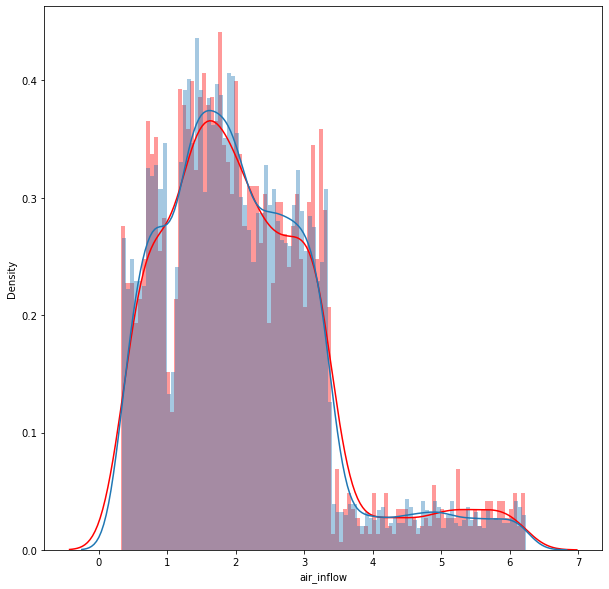

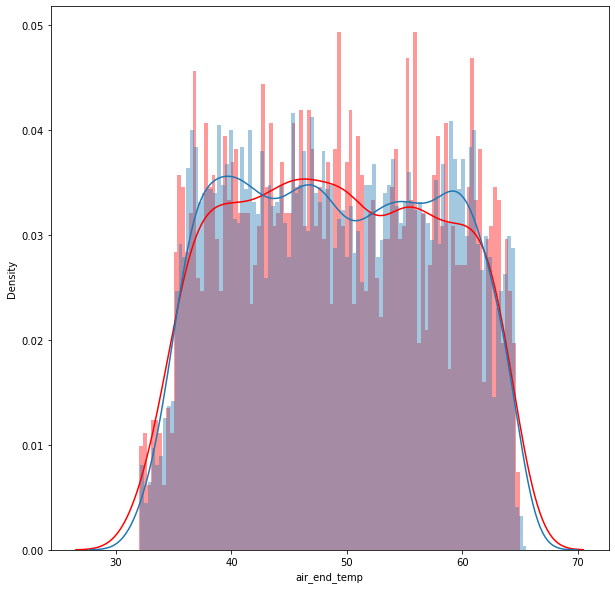

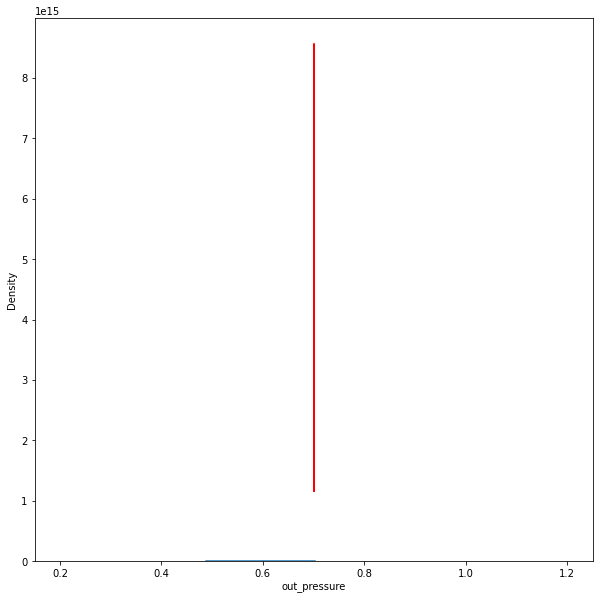

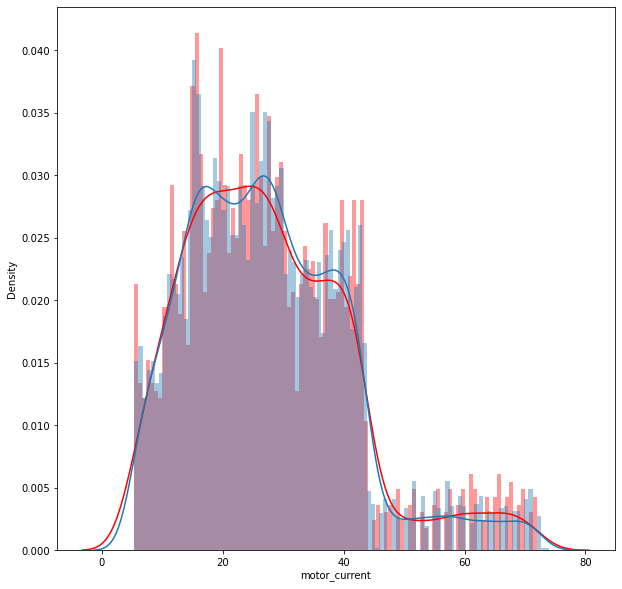

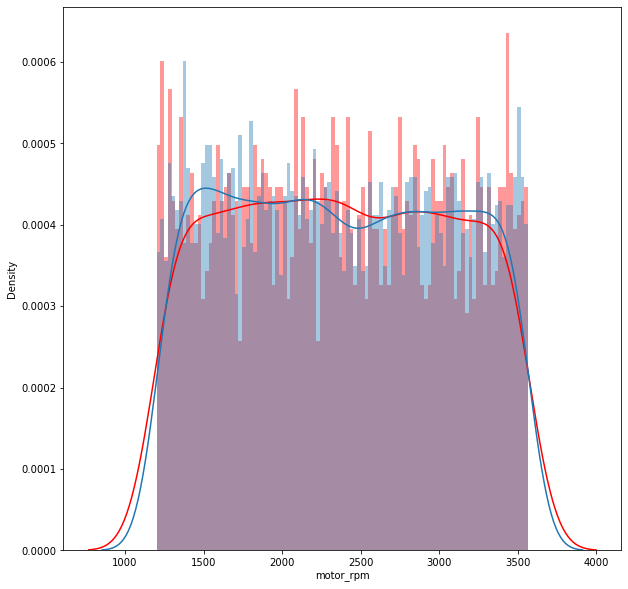

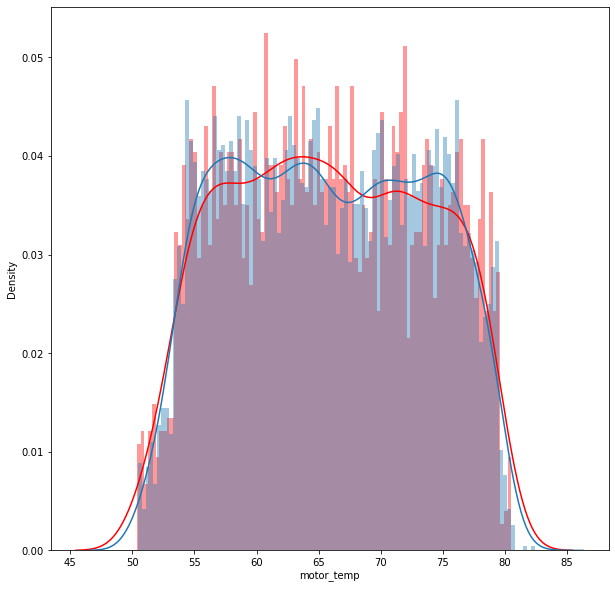

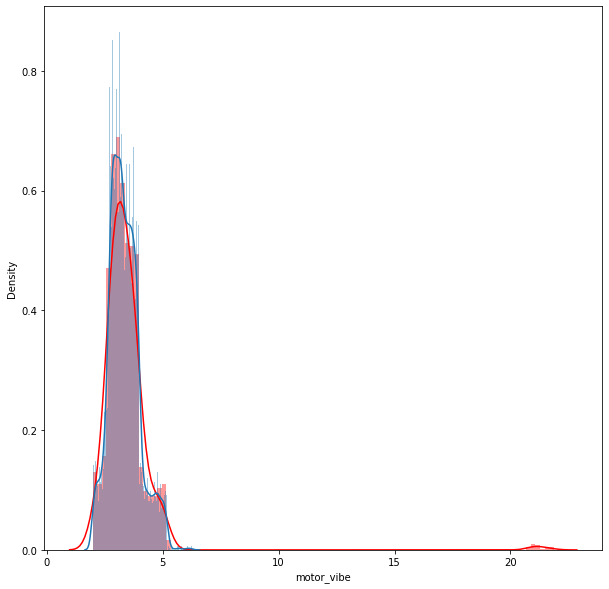

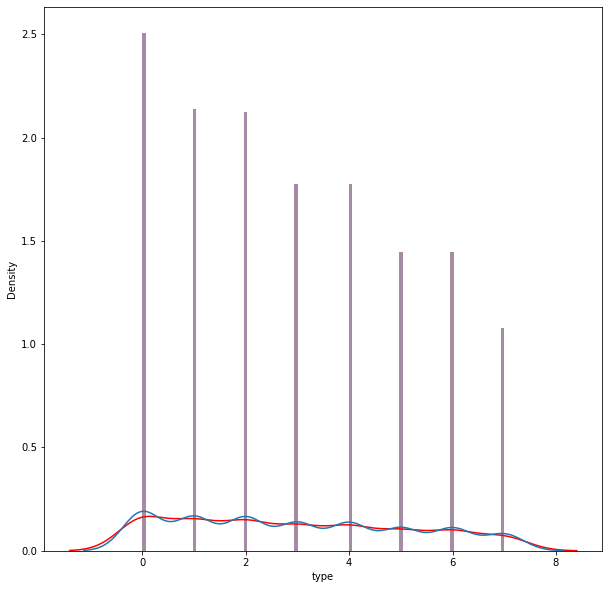

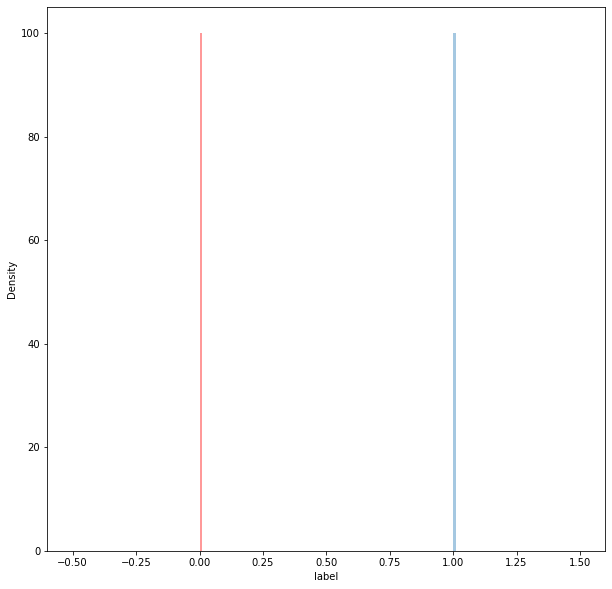

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore') 

for i in test.columns:
    plt.figure(figsize = (10,10))
    sns.distplot(train[i],color='red',bins=100)
    sns.distplot(test[i],bins=100)
    plt.show()

In [8]:
train.out_pressure.value_counts()

0.7    2463
Name: out_pressure, dtype: int64

In [9]:
test.out_pressure.value_counts()

0.70    7382
0.60       2
0.50       2
0.49       2
0.54       1
Name: out_pressure, dtype: int64

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type,label
count,2463.000000,2463.000000,2.463000e+03,2463.000000,2463.000000,2463.000000,2463.000000,2463.000000,2463.0
mean,2.128843,49.001137,7.000000e-01,27.490715,2372.576939,65.766707,3.452972,2.957369,0.0
std,1.202328,8.725091,2.964897e-14,13.604597,687.870774,7.797152,1.576386,2.230113,0.0
min,0.330000,32.030000,7.000000e-01,5.340000,1201.000000,50.360000,1.970000,0.000000,0.0
25%,1.280000,41.600000,7.000000e-01,17.110000,1784.500000,59.150000,2.880000,1.000000,0.0
50%,1.960000,48.980000,7.000000e-01,25.850000,2358.000000,65.640000,3.260000,3.000000,0.0
75%,2.820000,56.355000,7.000000e-01,36.000000,2971.000000,72.275000,3.730000,5.000000,0.0
max,6.220000,64.960000,7.000000e-01,72.000000,3564.000000,80.520000,21.870000,7.000000,0.0


In [11]:
# target = pd.concat([train,test],axis=0)

In [12]:
# from sklearn.cluster import KMeans

# classifier = KMeans(n_clusters=2)
# classifier.fit(train)
# pred = classifier.predict(test)

In [13]:
# import collections
# collections.Counter(pred)

In [14]:
cols = ['air_inflow', 'air_end_temp', 'out_pressure', 'motor_current',
       'motor_rpm', 'motor_temp', 'motor_vibe', 'type']

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(train)
pca.explained_variance_ratio_

array([9.99735043e-01, 2.48587825e-04])

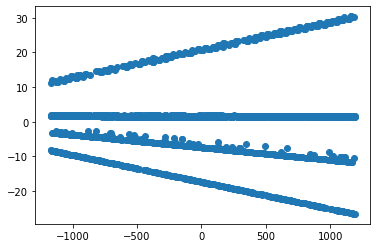

In [16]:
train_pca = pd.DataFrame(pca.fit_transform(train))
plt.scatter(train_pca[0],train_pca[1])

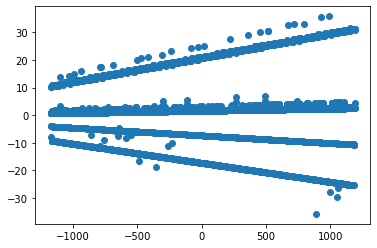

In [17]:
test_pca = pd.DataFrame(pca.fit_transform(test))
plt.scatter(test_pca[0],test_pca[1])

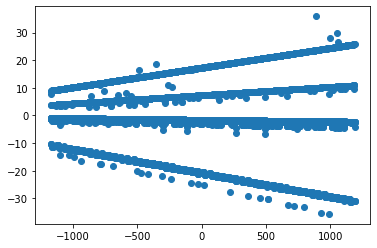

In [18]:
# train + test
target = pd.concat([train,test],axis=0)
target = target.loc[:,test.columns]
target_pca = pd.DataFrame(pca.fit_transform(target))
plt.scatter(target_pca[0],target_pca[1])

<Figure size 432x288 with 0 Axes>

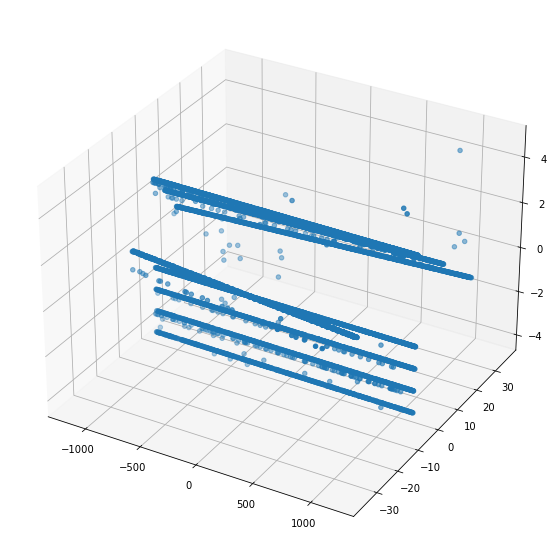

In [19]:
fig = plt.figure()
pca_3 = PCA(n_components=3)

temp = pca_3.fit_transform(target.loc[:,cols])
temp = pd.DataFrame(temp)

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(temp[0],temp[1],temp[2])


<Figure size 432x288 with 0 Axes>

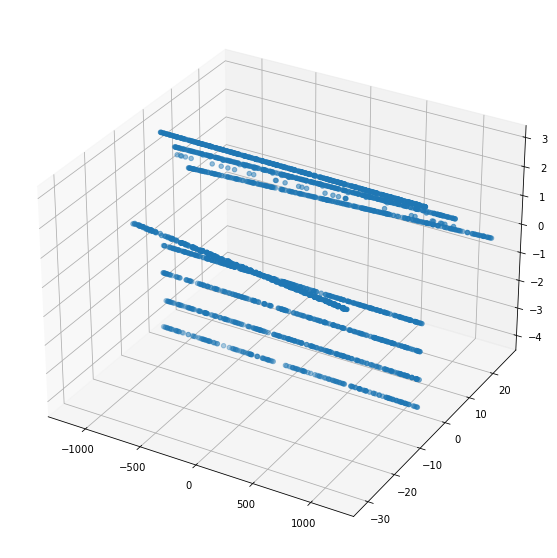

In [20]:
fig = plt.figure()
pca_3 = PCA(n_components=3)

pca_3.fit(target.loc[:,cols])


train = pd.read_csv('./train_data.csv')
temp = pca_3.transform(train)
temp = pd.DataFrame(temp)

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(temp[0],temp[1],temp[2])

In [35]:
# target = pd.concat([train,test],axis=0)
# target = target.reset_index(drop=True)
# pca_3.fit(target.loc[:,cols])

# temp = pca_3.transform(target.loc[:,cols])

# temp = pd.DataFrame(temp)
# temp['label'] = target['label']

In [38]:
# temp.label.value_counts()

1.0    7389
Name: label, dtype: int64

In [50]:
target

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type,label
0,1.59,41.00,0.7,20.53,1680.0,58.67,2.93,0,NaN
1,2.97,59.28,0.7,38.40,3142.0,74.91,3.75,0,NaN
2,1.91,45.29,0.7,24.73,2023.0,62.48,3.12,0,NaN
3,2.37,51.33,0.7,30.63,2506.0,67.84,3.39,0,NaN
4,1.90,45.21,0.7,24.65,2017.0,62.41,3.12,0,NaN
...,...,...,...,...,...,...,...,...,...
9847,2.12,48.08,0.7,27.45,2246.0,64.96,3.25,7,1.0
9848,1.48,39.63,0.7,19.19,1570.0,57.44,2.87,7,1.0
9849,1.56,40.61,0.7,20.15,1649.0,58.32,2.92,7,1.0
9850,1.59,40.99,0.7,20.52,1679.0,58.66,2.93,7,1.0


# train is absolute normal

- pca_3 : train + test, drop 3 dim

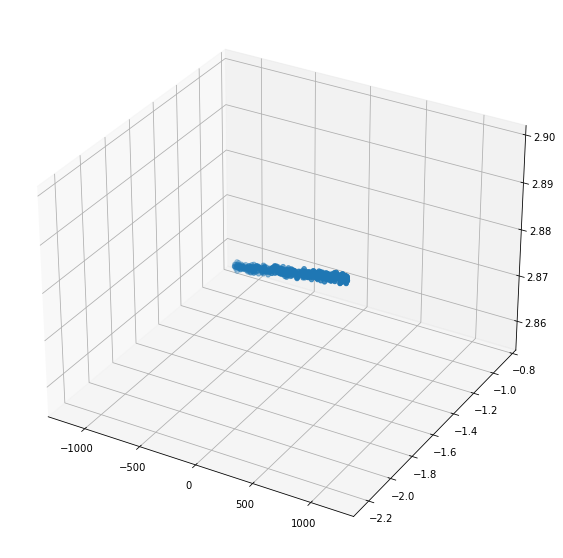

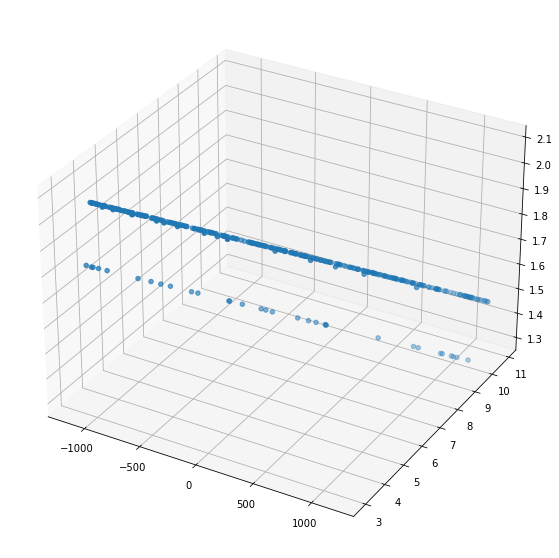

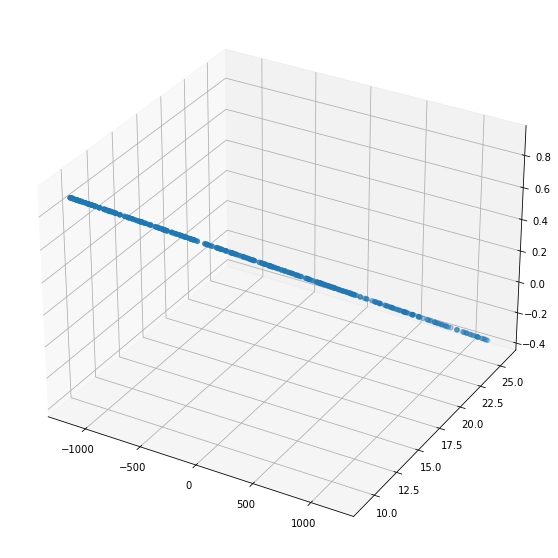

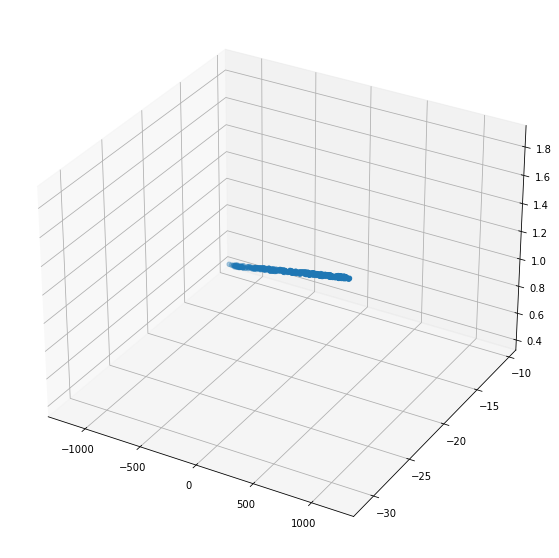

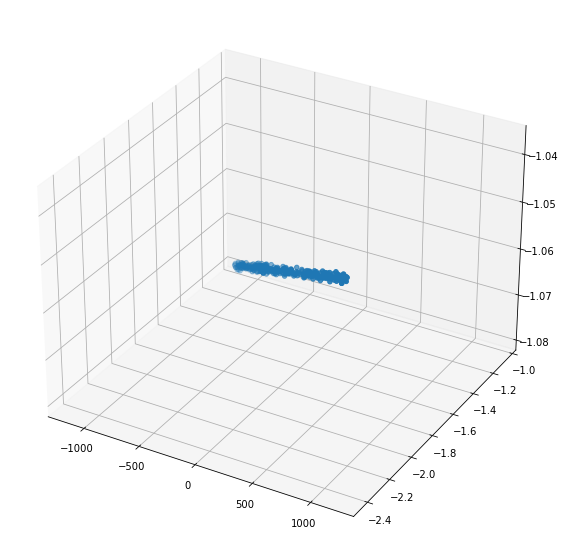

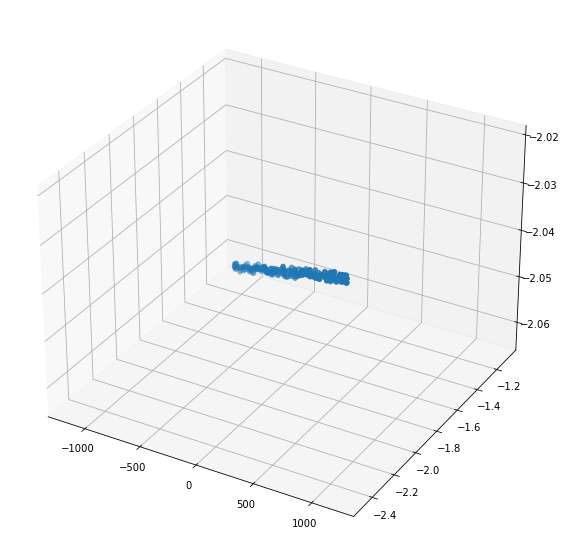

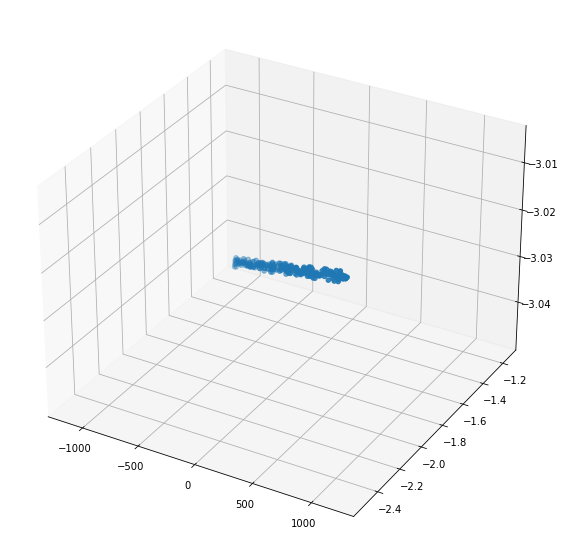

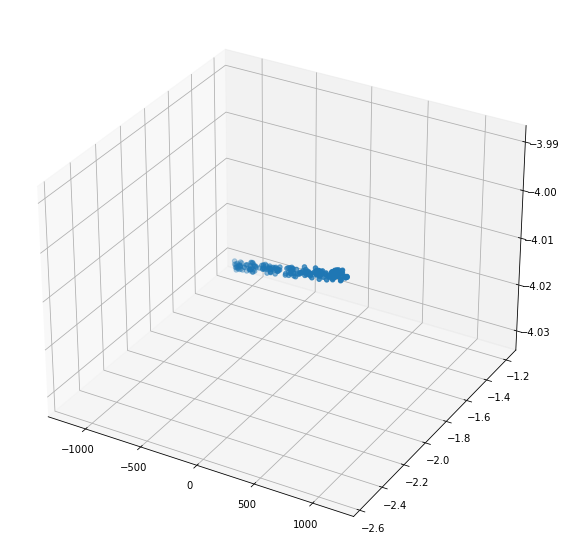

In [55]:
train = pd.read_csv('./train_data.csv')
test = pd.read_csv('./test_data.csv')
train['label'] = 0
test['label'] = 1
train = [train[train['type'] == i] for i in range(8)]
for i in train:
    temp = pca_3.transform(i.loc[:,cols])
    temp = pd.DataFrame(temp)

    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(temp[0],temp[1],temp[2])
    fig.show()

# find abnormal

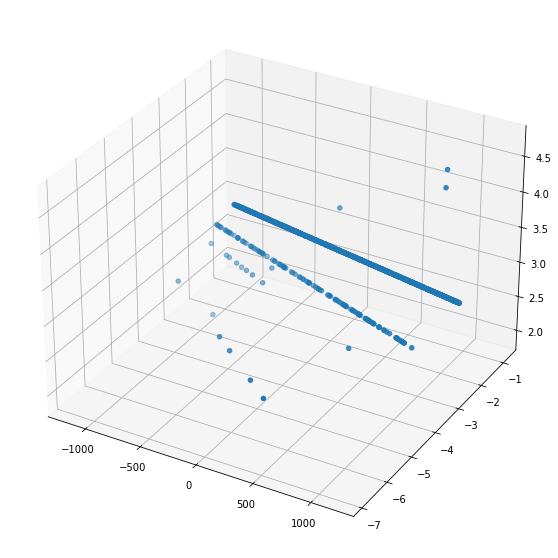

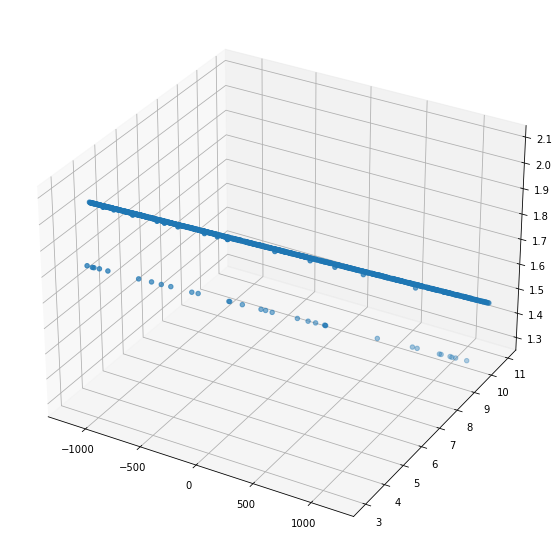

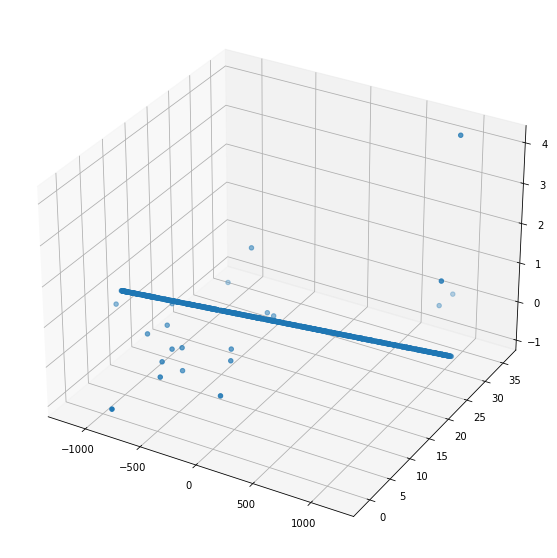

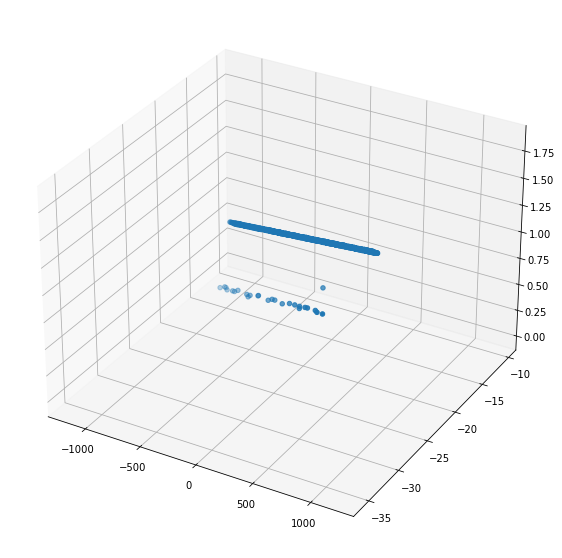

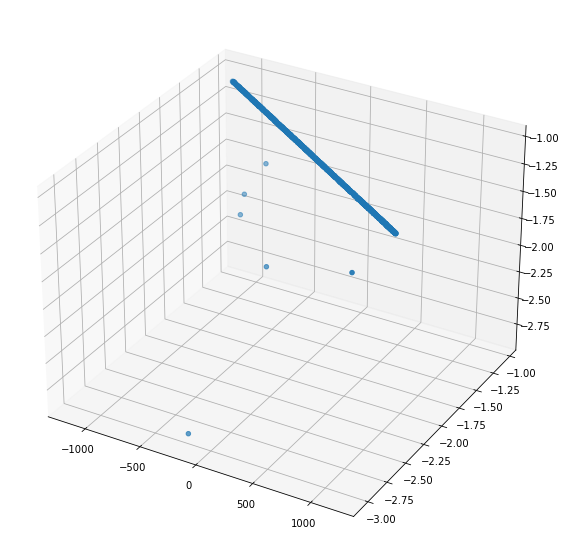

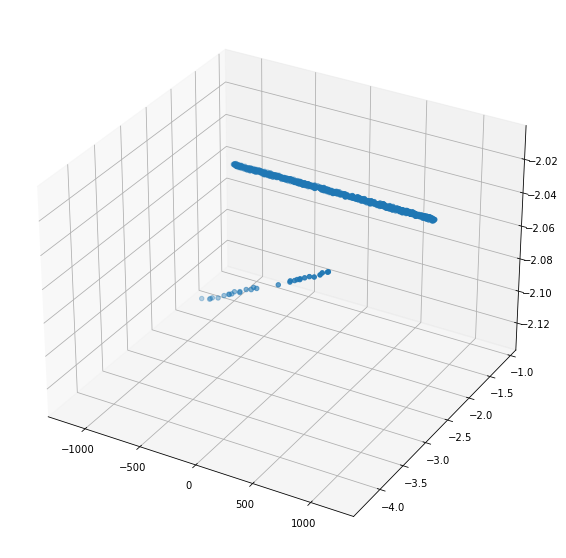

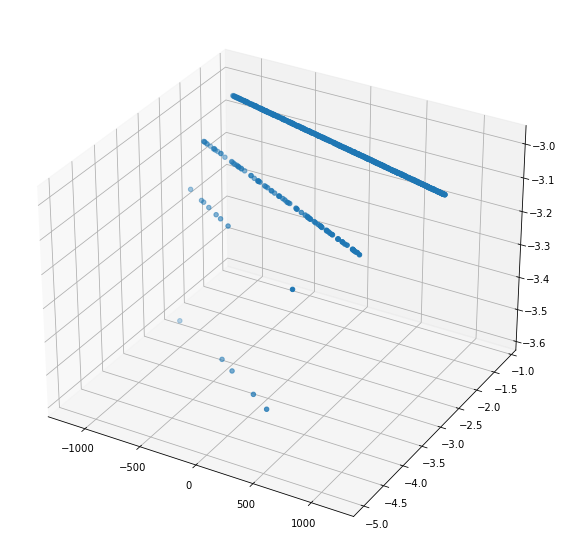

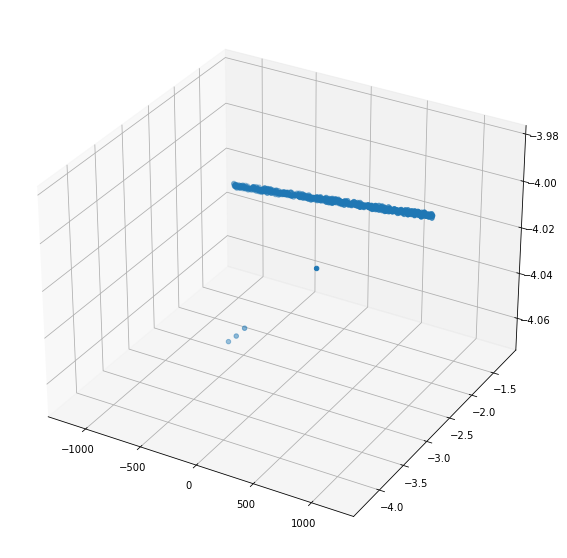

In [53]:
train = [target[target['type'] == i] for i in range(8)]
for i in train:
    temp = pca_3.transform(i.loc[:,cols])
    temp = pd.DataFrame(temp)

    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(temp[0],temp[1],temp[2])
    fig.show()